# Clase 5: DFA Mínimo y Conjuntos
Tomás de Camino Beck, Ph.D.

Estas notas son tomadas y adaptadas del libro:  
Esparza, J., & Blondin, M. (2023). *Automata Theory: An Algorithmic Approach*. MIT Press. ISBN: 9780262048637.

---
## DFA Mínimo

- **DFA/NFA mínimo:**
  - Es mínimo si no existe otro DFA/NFA que reconozca el mismo lenguaje con menos estados.
  - Cada lenguaje regular tiene un DFA mínimo único (con isomorfismos).

- **Algoritmo de minimización:**
  - Convierte un DFA dado en su DFA mínimo único.
  - Ejemplo en la figura 2.1 que reconocen el mismo lenguaje.

- **Consecuencias de un DFA mínimo:**
  - **Eficiencia de almacenamiento:** El DFA mínimo utiliza la mínima cantidad de memoria.
  - **Verificación de igualdad:** La unicidad del DFA mínimo permite comprobar rápidamente si dos lenguajes regulares son iguales verificando si sus DFAs mínimos son isomorfos.

### Algoritmo de Hopcroft para la Minimización de un DFA

El **algoritmo de Hopcroft** es un método eficiente para minimizar un DFA, es decir, para encontrar un DFA equivalente con el menor número de estados posible. Aquí te presento una descripción del algoritmo utilizando la notación que hemos discutido.

#### Input
- Un DFA $A = (Q, \Sigma, \delta, q_0, F)$.

#### Output
- Un DFA mínimo $M = (Q', \Sigma, \delta', q_0', F')$ tal que $L(M) = L(A)$ y $M$ tiene el menor número de estados posible.

#### Paso a Paso del Algoritmo

1. **Inicialización:**
   - Se empieza con una partición inicial $P$ que divide los estados en dos grupos:
     - $F$: El conjunto de estados finales.
     - $Q \setminus F$: El conjunto de estados no finales.

2. **Bucle Principal:**
   - Mientras $W$ no esté vacío:
     1. Seleccionar y remover un conjunto $A$ de $W$.
     2. Para cada símbolo $a \in \Sigma$, hacer lo siguiente:
        - Calcular $X = \lbrace q \in Q \mid \delta(q, a) \in A \rbrace$, que es el conjunto de estados que tienen una transición hacia $A$ bajo el símbolo $a$.
        - Para cada conjunto $Y$ en $P$ que interseca con $X$, dividir $Y$ en dos subconjuntos:
          - $Y_1 = Y \cap X$
          - $Y_2 = Y \setminus X$
        - Reemplazar $Y$ en $P$ por $Y_1$ y $Y_2$.
        - Si $Y$ estaba en $W$, reemplazarlo por $Y_1$ y $Y_2$. Si no, añadir el subconjunto más pequeño entre $Y_1$ y $Y_2$ a $W$.

3. **Construcción del DFA Mínimo:**
   - Una vez que se ha estabilizado la partición $P$, se construye el DFA mínimo $M$:
     - Los estados de $M$ son los conjuntos en la partición $P$.
     - El estado inicial $q_0'$ es el conjunto en $P$ que contiene $q_0$.
     - Los estados finales $F'$ son aquellos conjuntos en $P$ que intersectan con $F$.
     - La función de transición $\delta'$ se define de manera que $\delta'(Y, a) = Z$, donde $Z$ es el conjunto en $P$ que contiene los estados hacia los que transita cualquier estado en $Y$ bajo el símbolo $a$ en el DFA original.

4. **Resultado:**
   - El DFA $M$ es el DFA mínimo equivalente al DFA original $A$.

### Notas Finales
- **Eficiencia:** El algoritmo de Hopcroft es uno de los métodos más eficientes conocidos para la minimización de DFAs, con una complejidad temporal de $O(n \log n)$ en el peor de los casos, donde $n$ es el número de estados.
- **Canonicidad:** El DFA mínimo resultante es único (hasta isomorfismo), lo que significa que cualquier DFA que reconozca el mismo lenguaje tendrá la misma estructura mínima después de la minimización.

Este algoritmo es fundamental en teoría de autómatas y tiene aplicaciones prácticas en áreas como la optimización de compiladores, verificación formal y análisis de patrones.


#### Nota: $Q \backslash F$

La operación $Q \backslash F$ representa la **diferencia de conjuntos**, es decir, el conjunto de todos los elementos que están en $Q$ pero no en $F$. Matemáticamente, esto se expresa como:

$$Q \backslash F = \lbrace q \in Q : q \notin F \rbrace$$

En este ejemplo:

- $Q = \lbrace q_0, q_1, q_2, q_3, q_4 \rbrace$
- $F = \lbrace q_1, q_3 \rbrace$

Entonces, la diferencia $Q \ F$ es el conjunto de estados que están en $Q$ pero no en $F$:

$$Q \backslash F = \lbrace q_0, q_2, q_4 \rbrace$$

### Ejemplo (no está en el libro)

COnsideremos al DFA $A$, donde:

- $Q=\left\{ q_0, q_1, q_2, q_3, q_4, q_5 \right\}$.
- $\Sigma = \{0, 1\}$.
- La función de transición es $\delta$.
- El estado inicial es $q_0$.
- El conjunto de estados finales es $\left\{ q_2, q_5 \right\}$.

Para el ejemplo de clase vasmo a aplicar informalmente el algoritmo al autómata con la siguiente tabla de transicion:

| $\delta$  | $0$  | $1$  |
|-----------|------|------|
| $q_0$     | $q_1$ | $q_3$ |
| $q_1$     | $q_1$ | $q_4$ |
| $q_2$     | $q_0$ | $q_2$ |
| $q_3$     | $q_3$ | $q_2$ |
| $q_4$     | $q_4$ | $q_5$ |
| $q_5$     | $q_0$ | $q_2$ |





---

## Imprementación de Operaciones sobre Conjuntos

- **Autómatas como estructuras de datos:** En este libro, los autómatas se ven como estructuras de datos sobre un universo de objetos $U$.
- **Ejemplo con números naturales:**
  - Considera $U$ como el conjunto de números naturales y $A$ como un autómata sobre el alfabeto $\Sigma = \{0, 1\}$, Figura 3.1.
  - Las palabras en $A$ se interpretan como números binarios (bit más significativo primero).
  - $A$ acepta infinitos números pero no todos; por ejemplo, rechaza el número 4.
- **Pregunta motivadora:**
  - ¿Acepta $A$ todos los múltiplos de 3?
  - Algunos múltiplos de 3, como 0, 3, 6, 9, y 12, son aceptados por $A$.
  - El enfoque de fuerza bruta para verificar esto es tedioso e ineficiente.
- **Mejor enfoque:**
  - Considerar el autómata $B$, que acepta todos los múltiplos de 3.
  - Reformular la pregunta: ¿Se cumple que $\mathcal{L}(A) \subseteq \mathcal{L}(B)$ o ¿Se cumple que $\mathcal{L}(A) \cap \mathcal{L}(B) = \mathcal{L}(B)$?
- **Para responder:**
  - Implementar operaciones de inclusión, intersección, o igualdad.
  - Un algoritmo puede generar automáticamente un contraejemplo (una palabra en $B$ que no sea aceptada por $A$).
- **Aplicaciones:**
  - Estos algoritmos son útiles, por ejemplo, en la detección automática de errores en programas concurrentes.
  - Los contraejemplos en este contexto son equivalentes a detectar bugs.

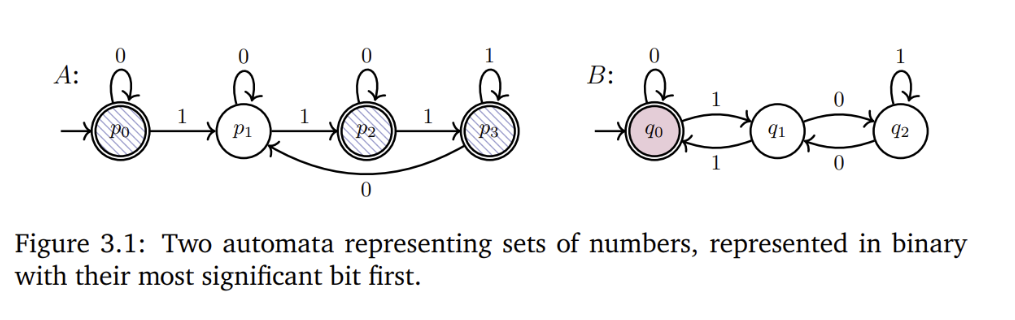



- Los **autómatas como estructura de datos** soportan las siguientes operaciones,Donde $U$ es el universo de objetos, $X, Y \subseteq U$ y $x \in U$:

  - **Member$(x, X)$:**  true si $x \in X$.
  - **Complement$(X)$:**  $U \setminus X$.
  - **Intersection$(X, Y)$:**  $X \cap Y$.
  - **Union$(X, Y)$:**  $X \cup Y$.
  - **Empty$(X)$:**  true si $X = \emptyset$.
  - **Universal$(X)$:**  true si $X = U$.
  - **Included$(X, Y)$:** true si $X \subseteq Y$.
  - **Equal$(X, Y)$:** true si $X = Y$.

Se asume que existe una bijección entre $U$ y $\Sigma^*$, es decir que nuestro universo es  $\Sigma^*$. En nuestra notación de palabras y lenguajes, las primeras operaciones serían:

  - **Member$(w, L)$**: Devuelve true si $w \in L$, false en caso contrario.
  - **Complement$(L)$**: Devuelve el complemento de $L$, es decir, $\overline{L}$.

### Membresía

- Para verificar la pertenencia de una palabra $w$ a un lenguaje, se ejecuta una corrida del DFA en $w$.
- Es útil definir un algoritmo `MemDFA[A](w, q)` que verifique si la palabra $w$ es aceptada desde el estado $q$ en $A$, es decir, si $w \in \mathcal{L}_A(q)$.
- La operación `Member(w, L)` puede implementarse como `MemDFA[A](w, q_0)`, donde $A$ es el autómata que representa a $L$.
- Usando las funciones `head(aw) = a` y `tail(aw) = w` para $a \in \Sigma$ y $w \in \Sigma^*$, la verificación se describe en el algoritmo 7.



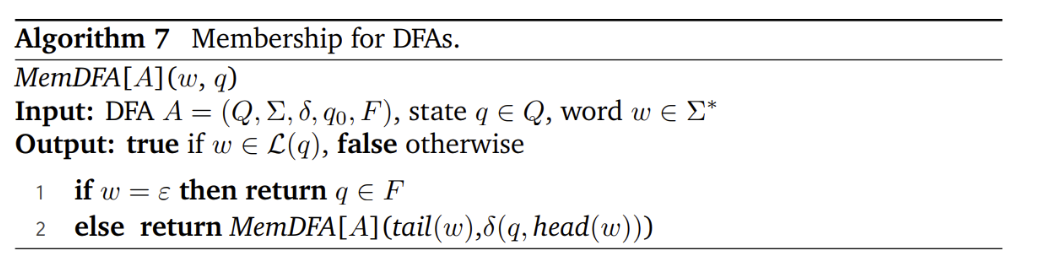

- **Complementación en DFAs:**
  - Un DFA tiene exactamente una ejecución para cada palabra, y esta es aceptante si y solo si llega a un estado final.
  - Si intercambiamos los estados finales y no finales, la ejecución de una palabra se convierte en aceptante si y solo si antes no lo era.
  - El nuevo DFA aceptará una palabra si y solo si el DFA original no la aceptaba.

- **Resultado:**
  - Se obtiene un procedimiento lineal (`CompDFA`) que complementa un DFA al intercambiar los estados finales y no finales.

Este procedimiento es eficiente y transforma el DFA original en su complemento con un tiempo de ejecución lineal, debido a que solo requiere una pasada para identificar y cambiar los estados finales.

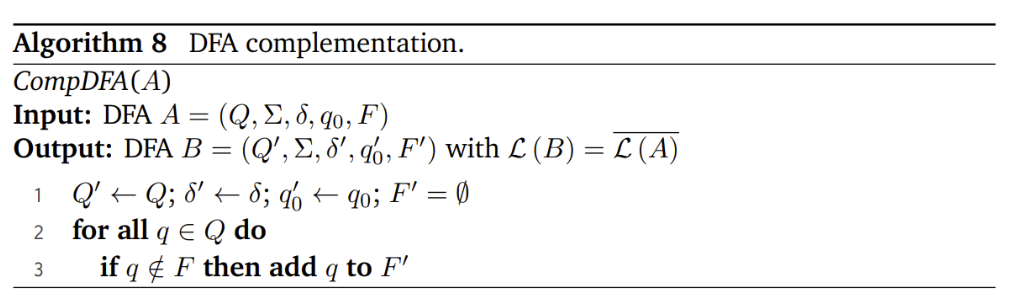

### Operaciones Booleanas

- **Implementación Genérica para Operaciones Booleanas:**
  - En lugar de implementar operaciones específicas para unión e intersección, se proporciona una implementación genérica para todas las operaciones booleanas binarias.
  
- **Funcionamiento:**
  - Dado dos DFAs $A_1$ y $A_2$ y una operación booleana binaria (como unión, intersección o diferencia), la implementación devuelve un DFA que reconoce el resultado de aplicar la operación a $\mathcal{L}(A_1)$ y $\mathcal{L}(A_2)$.
  
- **Estados y Transiciones:**
  - Los DFAs resultantes de diferentes operaciones booleanas tienen los mismos estados y transiciones; solo difieren en el conjunto de estados finales.

- **Definición del Emparejamiento:**
  - Este DFA, con un conjunto de estados finales aún no especificado, se denomina el emparejamiento de $A_1$ y $A_2$, denotado como $[A_1, A_2]$.

**Definición 3.1.** Sean $A_1 = (Q_1, \Sigma, \delta_1, q_{01}, F_1)$ y $A_2 = (Q_2, \Sigma, \delta_2, q_{02}, F_2)$ dos DFAs. El emparejamiento $[A_1, A_2]$ de $A_1$ y $A_2$ es la tupla $(Q, \Sigma, \delta, q_0)$ donde:

- $Q = \{[q_1, q_2] : q_1 \in Q_1, q_2 \in Q_2\}$,
- $\delta = \{([q_1, q_2], a, [q'_1, q'_2]) : (q_1, a, q'_1) \in \delta_1, (q_2, a, q'_2) \in \delta_2\}$,
- $q_0 = [q_{01}, q_{02}]$.

La ejecución de $[A_1, A_2]$ en una palabra de $\Sigma^*$ se define como para los DFAs.

### Ejemplo 3.2

Aplicación del emparejamiento figura 3.5 (primeras dos líneas)

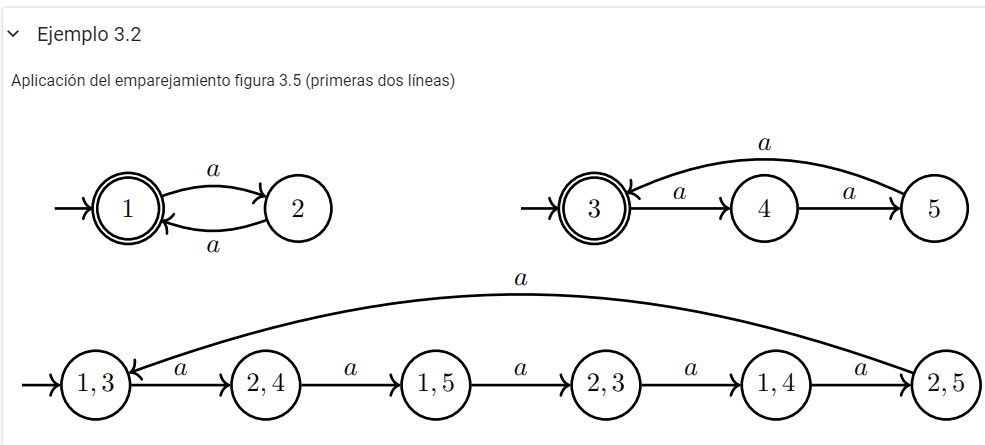

## Reto

- Implementar el algoritmo 9 de la página 74, e incluirlo en el código del DFA indicado por el profesor.
- Usar el ejempllo de la figura 3.5 para probar

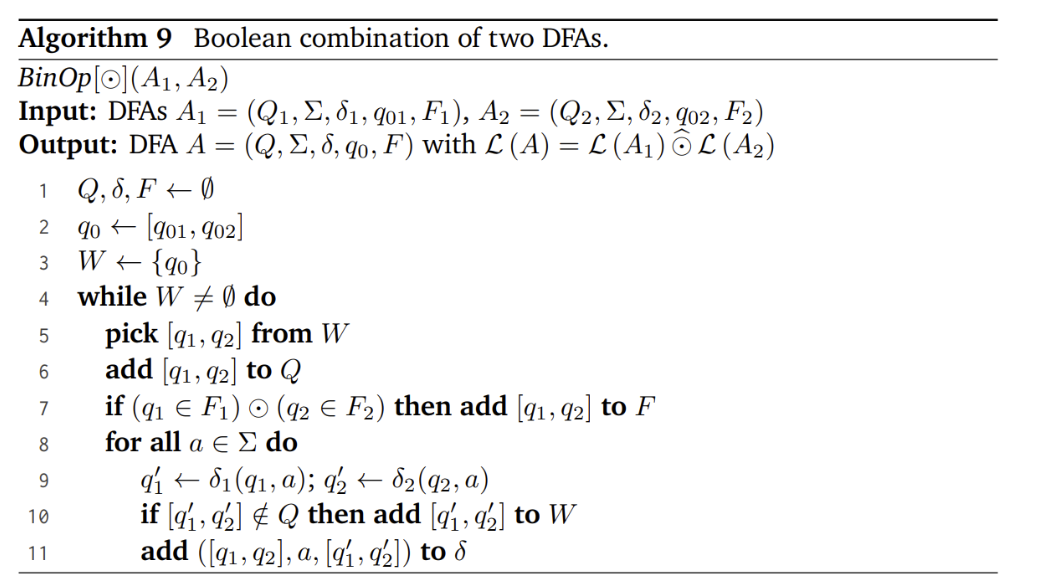


In [1]:

class DFA:
    def __init__(self, Q, Sigma, delta, q0, F):
        self.Q = Q          # Set of states
        self.Sigma = Sigma  # Alphabet
        self.delta = delta  # Transition function
        self.q0 = q0        # Initial state
        self.F = F          # Set of final states

    def head(self, w):
        """Returns the first symbol of the word w."""
        return w[0] if w else None

    def tail(self, w):
        """Returns the word w without its first symbol."""
        return w[1:] if w else ""

    def MemDFA(self, w, q):
        """Recursive function to check if the DFA accepts the word w starting from state q."""
        if w == "":
            return q in self.F
        else:
            a = self.head(w)        # Using head(w)
            w_tail = self.tail(w)   # Using tail(w)
            q_next = self.delta[q][a]
            return self.MemDFA(w_tail, q_next)

    def CompDFA(self):
        """Returns the complement of the current DFA."""
        # Step 1: Initialize Q', δ', q0' and F'
        Q_prime = self.Q
        delta_prime = self.delta
        q0_prime = self.q0
        F_prime = set()  # Initially empty

        # Step 2: Complete F'
        for q in self.Q:
            if q not in self.F:
                F_prime.add(q)

        # Return the new complemented DFA
        return DFA(Q_prime, self.Sigma, delta_prime, q0_prime, F_prime)
    def print_dfa(self):
        """Prints all states and transitions of the DFA."""
        print(f"States: {self.Q}")
        print(f"Alphabet: {self.Sigma}")
        print(f"Initial state: {self.q0}")
        print(f"Final states: {self.F}")
        print("Transitions:")
        for state in self.Q:
            for symbol in self.Sigma:
                if symbol in self.delta[state]:
                    print(f"  {state} --{symbol}--> {self.delta[state][symbol]}")

    @staticmethod
    def combine_dfa(dfa1, dfa2, operation):
        """Combine two DFAs using a boolean operation (AND or OR)."""
        # Step 1: Create the combined state set Q'
        Q_prime = {(q1, q2) for q1 in dfa1.Q for q2 in dfa2.Q}

        # Step 2: Define the initial state q0' and the set of final states F'
        q0_prime = (dfa1.q0, dfa2.q0)

        # Step 3: Define the transition function delta'
        delta_prime = {}
        for (q1, q2) in Q_prime:
            delta_prime[(q1, q2)] = {}
            for a in dfa1.Sigma:
                delta_prime[(q1, q2)][a] = (dfa1.delta[q1][a], dfa2.delta[q2][a])

        # Step 4: Define the final states based on the boolean operation
        if operation == "AND":
            F_prime = {(q1, q2) for (q1, q2) in Q_prime if q1 in dfa1.F and q2 in dfa2.F}
        elif operation == "OR":
            F_prime = {(q1, q2) for (q1, q2) in Q_prime if q1 in dfa1.F or q2 in dfa2.F}
        else:
            raise ValueError("Invalid operation. Use 'AND' or 'OR'.")

        # Return the new combined DFA
        return DFA(Q_prime, dfa1.Sigma, delta_prime, q0_prime, F_prime)










Q1 = {'1', '2'}
Sigma1 = {'a'}
delta1 = {
    '1': {'a': '2'},
    '2': {'a': '1'}
}
q01 = '1'
F1 = {'1'}

dfa1 = DFA(Q1, Sigma1, delta1, q01, F1)
#########################################

Q2 = {'3', '4', '5'}
Sigma2 = {'a'}
delta2 = {
    '3': {'a': '4'},
    '4': {'a': '5'},
	'5': {'a': '3'}
}
q02 = '3'
F2 = {'3'}
dfa2 = DFA(Q2, Sigma2, delta2, q02, F2)


# Combine DFAs using AND operation
combined_dfa_and = DFA.combine_dfa(dfa1, dfa2, "AND")
combined_dfa_or = DFA.combine_dfa(dfa1, dfa2, "OR")

# Testing the combined DFA with some input strings
input_string = "aaaa"




print(f"Input '{input_string}' accepted by AND combined DFA: {combined_dfa_and.MemDFA(input_string, combined_dfa_and.q0)}")
print(f"Input '{input_string}' accepted by OR combined DFA: {combined_dfa_or.MemDFA(input_string, combined_dfa_or.q0)}")

combined_dfa_or.print_dfa()
combined_dfa_and.print_dfa()




Input 'aaaa' accepted by AND combined DFA: False
Input 'aaaa' accepted by OR combined DFA: True
States: {('1', '5'), ('2', '3'), ('1', '3'), ('2', '4'), ('1', '4'), ('2', '5')}
Alphabet: {'a'}
Initial state: ('1', '3')
Final states: {('1', '5'), ('1', '4'), ('1', '3'), ('2', '3')}
Transitions:
  ('1', '5') --a--> ('2', '3')
  ('2', '3') --a--> ('1', '4')
  ('1', '3') --a--> ('2', '4')
  ('2', '4') --a--> ('1', '5')
  ('1', '4') --a--> ('2', '5')
  ('2', '5') --a--> ('1', '3')
States: {('1', '5'), ('2', '3'), ('1', '3'), ('2', '4'), ('1', '4'), ('2', '5')}
Alphabet: {'a'}
Initial state: ('1', '3')
Final states: {('1', '3')}
Transitions:
  ('1', '5') --a--> ('2', '3')
  ('2', '3') --a--> ('1', '4')
  ('1', '3') --a--> ('2', '4')
  ('2', '4') --a--> ('1', '5')
  ('1', '4') --a--> ('2', '5')
  ('2', '5') --a--> ('1', '3')
